In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import os
for dirname, _, filenames in os.walk('Titanic-Dataset.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [4]:
titanic_data = pd.read_csv('Titanic-Dataset.csv')

In [5]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
titanic_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [7]:
titanic_data.shape

(891, 12)

In [8]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
if 'Cabin' in titanic_data.columns:
    titanic_data.drop(columns='Cabin', inplace=True)

In [11]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [12]:
if 'Age' in titanic_data.columns:
    titanic_data['Age'] = titanic_data['Age'].fillna(titanic_data['Age'].mean(skipna=True))

In [13]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [14]:
if 'Embarked' in titanic_data.columns:
    titanic_data['Embarked'] = titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0])

In [15]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

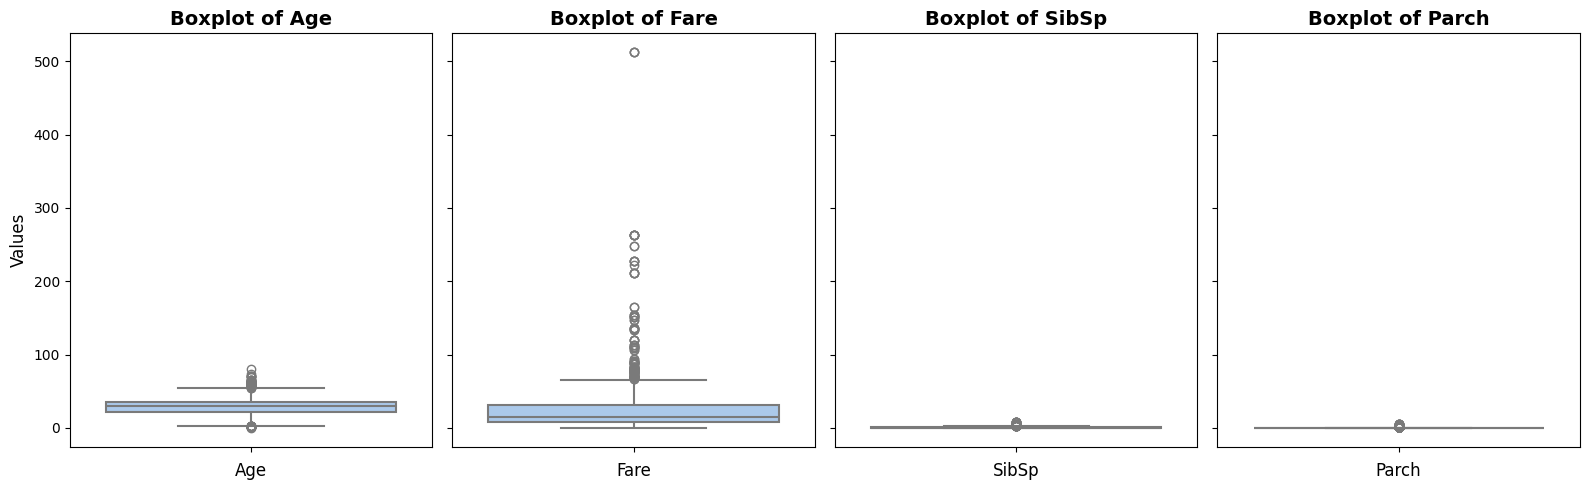

In [16]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

numerical_columns = ['Age', 'Fare', 'SibSp', 'Parch']

fig, axes = plt.subplots(nrows=1, ncols=len(numerical_columns), figsize=(16, 5), sharey=True)

for i, col in enumerate(numerical_columns):
    sns.boxplot(y=titanic_data[col], ax=axes[i], palette= "pastel", linewidth=1.5)
    axes[i].set_title(f"Boxplot of {col}", fontsize=14, weight='bold')
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel("Values", fontsize=12 if i == 0 else 0)

plt.tight_layout()
plt.show()

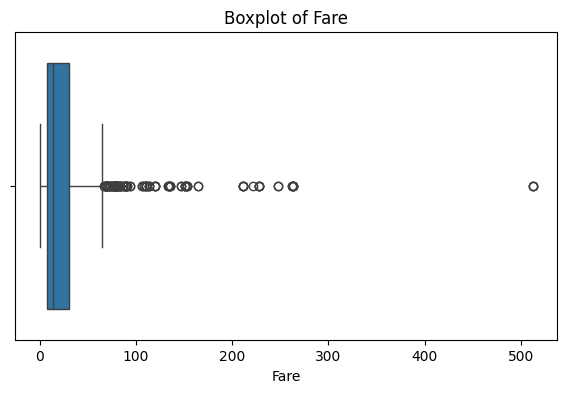

In [17]:
plt.figure(figsize=(7, 4))
sns.boxplot(x=titanic_data['Fare'])
plt.title('Boxplot of Fare')
plt.show()

In [18]:
Q1 = titanic_data['Fare'].quantile(0.25)
Q3 = titanic_data['Fare'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = titanic_data[(titanic_data['Fare'] < lower_bound) | (titanic_data['Fare'] > upper_bound)]
print(outliers)

     PassengerId  Survived  Pclass  \
1              2         1       1   
27            28         0       1   
31            32         1       1   
34            35         0       1   
52            53         1       1   
..           ...       ...     ...   
846          847         0       3   
849          850         1       1   
856          857         1       1   
863          864         0       3   
879          880         1       1   

                                                  Name     Sex        Age  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.000000   
27                      Fortune, Mr. Charles Alexander    male  19.000000   
31      Spencer, Mrs. William Augustus (Marie Eugenie)  female  29.699118   
34                             Meyer, Mr. Edgar Joseph    male  28.000000   
52            Harper, Mrs. Henry Sleeper (Myna Haxtun)  female  49.000000   
..                                                 ...     ...        ...   
846 

In [19]:
titanic_data['Fare'] = titanic_data['Fare'].clip(lower_bound, upper_bound)

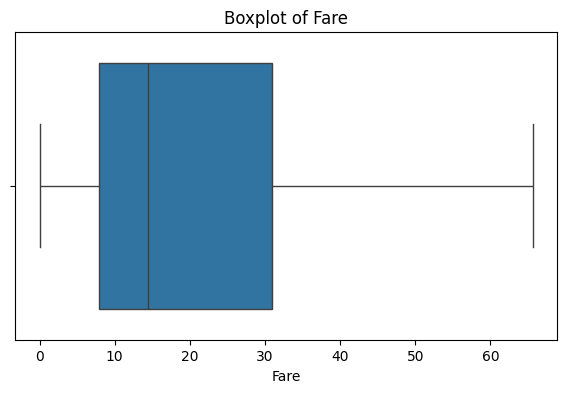

In [20]:
plt.figure(figsize=(7, 4))
sns.boxplot(x=titanic_data['Fare'])
plt.title('Boxplot of Fare')
plt.show()

In [21]:
print("Descriptive statistics for all columns: ")
titanic_data.describe()

Descriptive statistics for all columns: 


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,24.046813
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,20.481625
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,65.634400


In [22]:
survival_counts = titanic_data['Survived'].value_counts()
print(survival_counts)

Survived
0    549
1    342
Name: count, dtype: int64


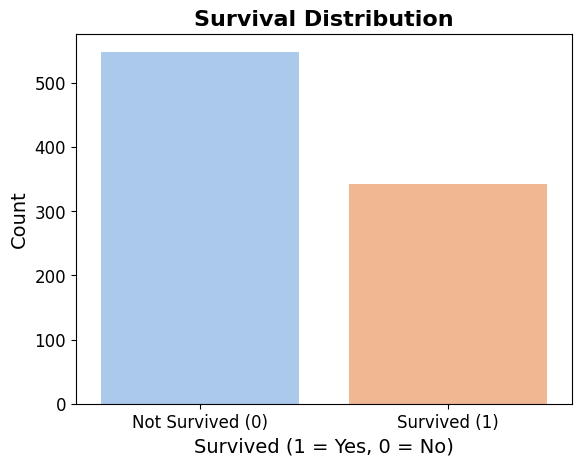

In [23]:
sns.countplot(data=titanic_data, x='Survived', palette='pastel')
plt.title('Survival Distribution', fontsize=16, weight='bold')
plt.xlabel('Survived (1 = Yes, 0 = No)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks([0, 1], ['Not Survived (0)', 'Survived (1)'], fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [24]:
sex_counts = titanic_data['Sex'].value_counts()
print(sex_counts)

Sex
male      577
female    314
Name: count, dtype: int64


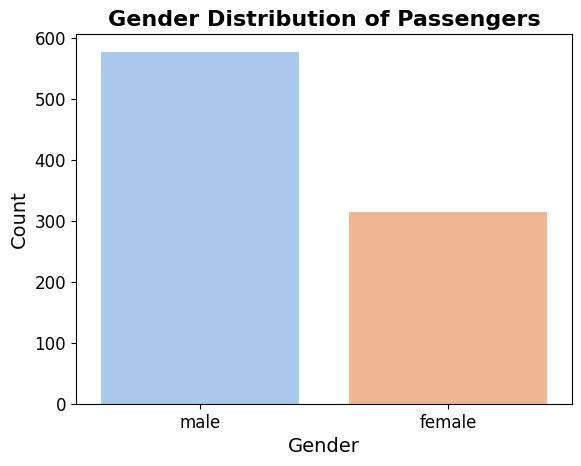

In [25]:
sns.countplot(data=titanic_data, x='Sex', palette='pastel')
plt.title('Gender Distribution of Passengers', fontsize=16, weight='bold')
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

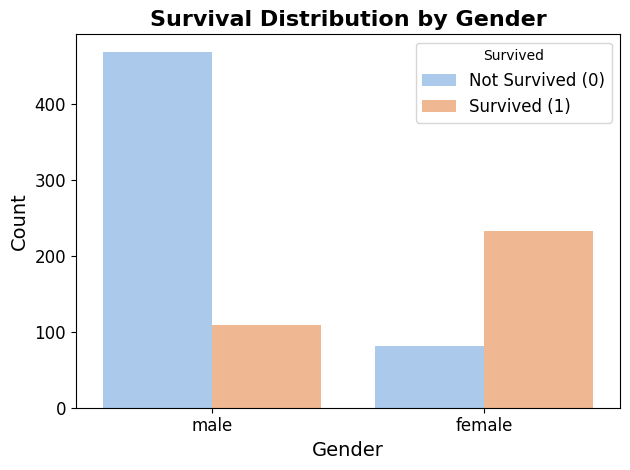

In [26]:
sns.countplot(x='Sex', hue='Survived', data=titanic_data, palette='pastel')

plt.title('Survival Distribution by Gender', fontsize=16, weight='bold')
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Survived', labels=['Not Survived (0)', 'Survived (1)'], fontsize=12)

plt.tight_layout()
plt.show()

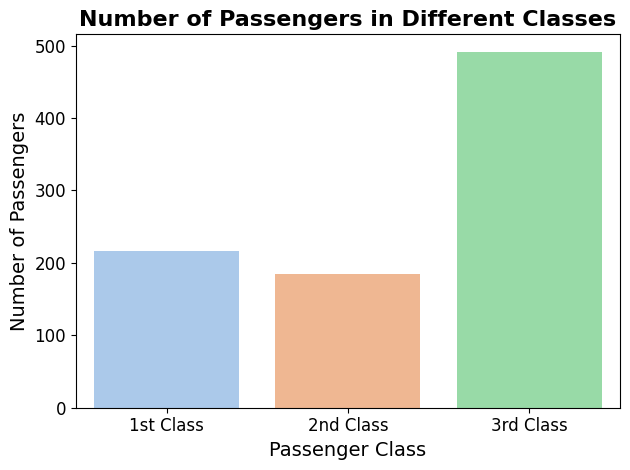

In [27]:
sns.countplot(x='Pclass', data=titanic_data, palette='pastel')

plt.title('Number of Passengers in Different Classes', fontsize=16, weight='bold')
plt.xlabel('Passenger Class', fontsize=14)
plt.ylabel('Number of Passengers', fontsize=14)
plt.xticks([0, 1, 2], ['1st Class', '2nd Class', '3rd Class'], fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

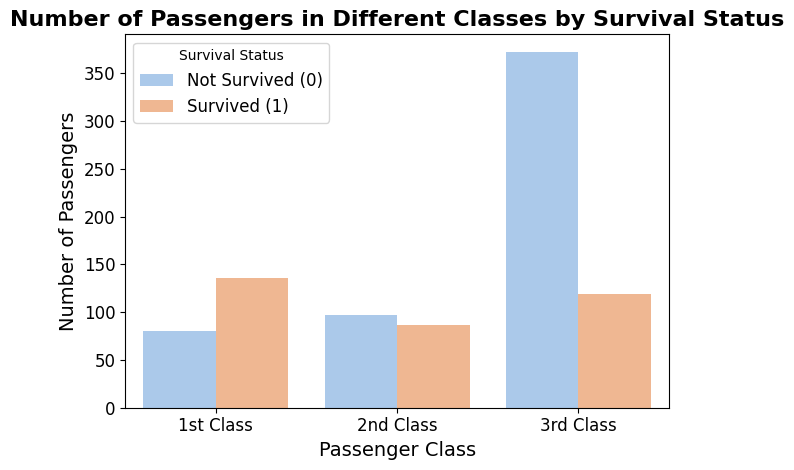

In [28]:
sns.countplot(x='Pclass', hue='Survived', data=titanic_data, palette='pastel')

plt.title('Number of Passengers in Different Classes by Survival Status', fontsize=16, weight='bold')
plt.xlabel('Passenger Class', fontsize=14)
plt.ylabel('Number of Passengers', fontsize=14)
plt.xticks([0, 1, 2], ['1st Class', '2nd Class', '3rd Class'], fontsize=12)
plt.yticks(fontsize=12)

plt.legend(title='Survival Status', labels=['Not Survived (0)', 'Survived (1)'], fontsize=12)

plt.tight_layout()
plt.show()

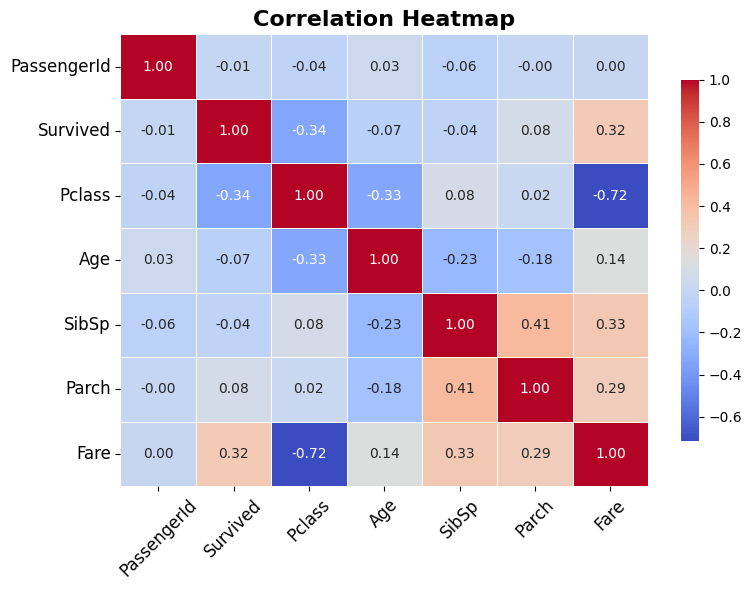

In [29]:
numerical_features = titanic_data.select_dtypes(include=np.number).columns
correlation_matrix = titanic_data[numerical_features].corr()

plt.figure(figsize=(8, 6))

sns.heatmap(
    correlation_matrix,
    annot=True,          
    fmt=".2f",           
    cmap="coolwarm",     
    linewidths=0.5,      
    cbar_kws={'shrink': 0.8}  
)

plt.title("Correlation Heatmap", fontsize=16, weight='bold')
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)


plt.tight_layout()
plt.show()

In [30]:
print(titanic_data['Sex'].value_counts())

Sex
male      577
female    314
Name: count, dtype: int64


In [31]:
titanic_data['Sex'] = titanic_data['Sex'].map({'male': 0, 'female': 1})

In [32]:
print(titanic_data['Sex'].head())

0    0
1    1
2    1
3    1
4    0
Name: Sex, dtype: int64


In [33]:
print(titanic_data['Embarked'].value_counts())
print("S: Southampton, C: Cherbourg, Q: Queenstown")

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64
S: Southampton, C: Cherbourg, Q: Queenstown


In [34]:
titanic_data['Embarked'] = titanic_data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

In [35]:
print(titanic_data['Embarked'].head())

0    0
1    1
2    0
3    0
4    0
Name: Embarked, dtype: int64


In [36]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,65.6344,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


In [37]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 76.7+ KB


In [38]:
if 'Name' in titanic_data.columns:  
    titanic_data = titanic_data.drop(columns=['Name'])

In [39]:
if 'PassengerId' in titanic_data.columns: 
    titanic_data = titanic_data.drop(columns=['PassengerId'])

In [40]:
if 'Ticket' in titanic_data.columns:  
    titanic_data = titanic_data.drop(columns=['Ticket'])

In [41]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


In [42]:
from sklearn.preprocessing import StandardScaler

numerical_columns = ['Age', 'Fare']

scaler = StandardScaler()

titanic_data[numerical_columns] = scaler.fit_transform(titanic_data[numerical_columns])

print(titanic_data[numerical_columns].head())

        Age      Fare
0 -0.592481 -0.820552
1  0.638789  2.031623
2 -0.284663 -0.787578
3  0.407926  1.419297
4  0.407926 -0.781471


In [43]:
print(titanic_data[numerical_columns].describe())

                Age          Fare
count  8.910000e+02  8.910000e+02
mean   2.232906e-16  9.968332e-17
std    1.000562e+00  1.000562e+00
min   -2.253155e+00 -1.174727e+00
25%   -5.924806e-01 -7.882908e-01
50%    0.000000e+00 -4.686152e-01
75%    4.079260e-01  3.396748e-01
max    3.870872e+00  2.031623e+00


In [44]:
from sklearn.model_selection import train_test_split

X = titanic_data.drop(columns=['Survived'])  
y = titanic_data['Survived']  

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [46]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

In [47]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy_rf = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_rf:.2f}")

Accuracy: 0.81


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.85       110
           1       0.77      0.72      0.75        69

    accuracy                           0.81       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179



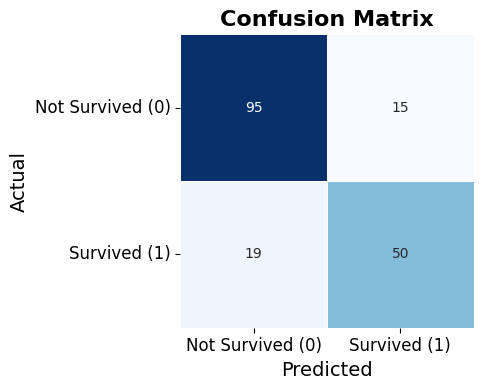

In [48]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5, square=True)
plt.title("Confusion Matrix", fontsize=16, weight='bold')
plt.xlabel("Predicted", fontsize=14)
plt.ylabel("Actual", fontsize=14)
plt.xticks(ticks=[0.5, 1.5], labels=["Not Survived (0)", "Survived (1)"], fontsize=12)
plt.yticks(ticks=[0.5, 1.5], labels=["Not Survived (0)", "Survived (1)"], fontsize=12, rotation=0)
plt.tight_layout()
plt.show()

In [49]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(criterion='gini', max_depth=None, random_state=42)

dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

In [50]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt:.2f}")

Decision Tree Accuracy: 0.80



Classification Report:

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       110
           1       0.74      0.74      0.74        69

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179


Confusion Matrix:
 [[92 18]
 [18 51]]


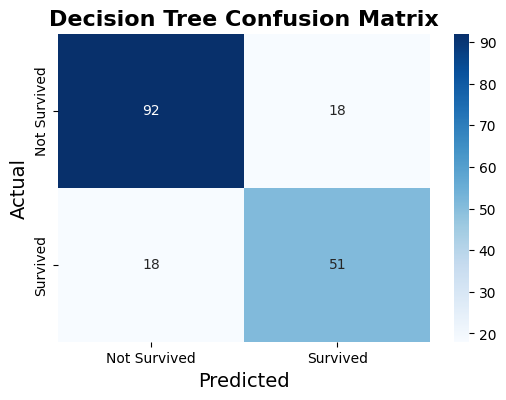

In [51]:
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_dt))

cm_dt = confusion_matrix(y_test, y_pred_dt)
print("\nConfusion Matrix:\n", cm_dt)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Survived", "Survived"], yticklabels=["Not Survived", "Survived"])
plt.title("Decision Tree Confusion Matrix", fontsize=16, weight='bold')
plt.xlabel("Predicted", fontsize=14)
plt.ylabel("Actual", fontsize=14)
plt.show()

In [52]:
from sklearn.svm import SVC

svm_model = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)  

svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)

In [53]:
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm:.2f}")

SVM Accuracy: 0.83



Classification Report:

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       110
           1       0.83      0.70      0.76        69

    accuracy                           0.83       179
   macro avg       0.83      0.80      0.81       179
weighted avg       0.83      0.83      0.82       179


Confusion Matrix:
 [[100  10]
 [ 21  48]]


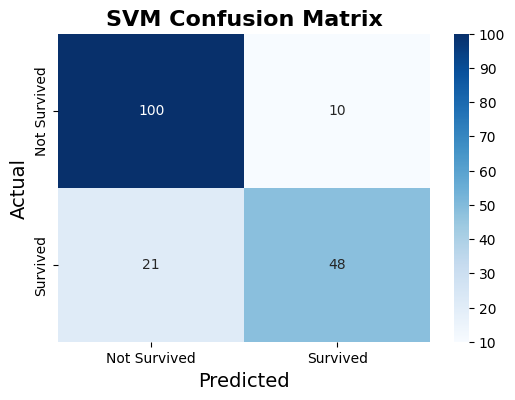

In [54]:
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_svm))

cm_svm = confusion_matrix(y_test, y_pred_svm)
print("\nConfusion Matrix:\n", cm_svm)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Survived", "Survived"], yticklabels=["Not Survived", "Survived"])
plt.title("SVM Confusion Matrix", fontsize=16, weight='bold')
plt.xlabel("Predicted", fontsize=14)
plt.ylabel("Actual", fontsize=14)
plt.show()

In [55]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5, weights='uniform', metric='minkowski')

knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)

In [56]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {accuracy_knn:.2f}")

KNN Accuracy: 0.78



Classification Report:

              precision    recall  f1-score   support

           0       0.79      0.86      0.83       110
           1       0.75      0.64      0.69        69

    accuracy                           0.78       179
   macro avg       0.77      0.75      0.76       179
weighted avg       0.77      0.78      0.77       179


Confusion Matrix:
 [[95 15]
 [25 44]]


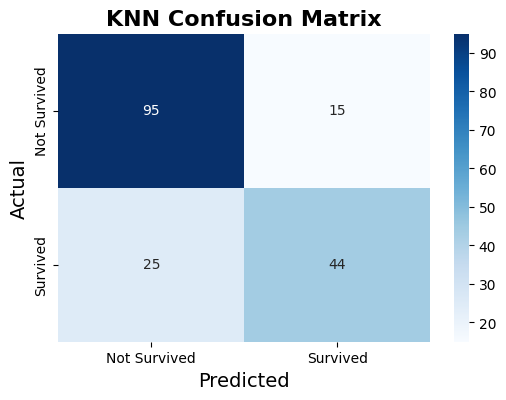

In [57]:
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_knn))

cm_knn = confusion_matrix(y_test, y_pred_knn)
print("\nConfusion Matrix:\n", cm_knn)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Survived", "Survived"], yticklabels=["Not Survived", "Survived"])
plt.title("KNN Confusion Matrix", fontsize=16, weight='bold')
plt.xlabel("Predicted", fontsize=14)
plt.ylabel("Actual", fontsize=14)
plt.show()

In [58]:
from sklearn.linear_model import LogisticRegression

logreg_model = LogisticRegression(random_state=42, solver='liblinear')  # Using 'liblinear' solver for small datasets

logreg_model.fit(X_train, y_train)

y_pred_logreg = logreg_model.predict(X_test)

In [59]:
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"Logistic Regression Accuracy: {accuracy_logreg:.2f}")

Logistic Regression Accuracy: 0.79



Classification Report:

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       110
           1       0.77      0.67      0.71        69

    accuracy                           0.79       179
   macro avg       0.79      0.77      0.78       179
weighted avg       0.79      0.79      0.79       179


Confusion Matrix:
 [[96 14]
 [23 46]]


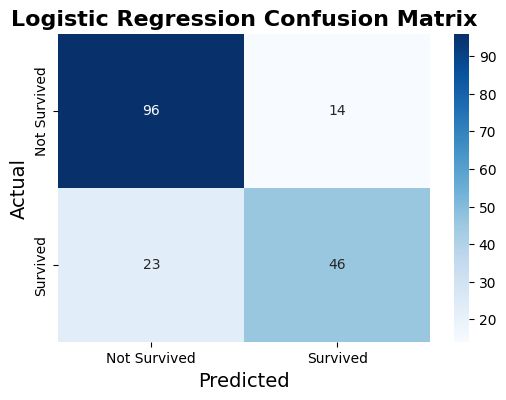

In [60]:
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_logreg))

cm_logreg = confusion_matrix(y_test, y_pred_logreg)
print("\nConfusion Matrix:\n", cm_logreg)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_logreg, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Survived", "Survived"], yticklabels=["Not Survived", "Survived"])
plt.title("Logistic Regression Confusion Matrix", fontsize=16, weight='bold')
plt.xlabel("Predicted", fontsize=14)
plt.ylabel("Actual", fontsize=14)
plt.show()

Neural Network Accuracy: 0.80

Classification Report:

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       110
           1       0.80      0.64      0.71        69

    accuracy                           0.80       179
   macro avg       0.80      0.77      0.78       179
weighted avg       0.80      0.80      0.79       179


Confusion Matrix:
 [[99 11]
 [25 44]]


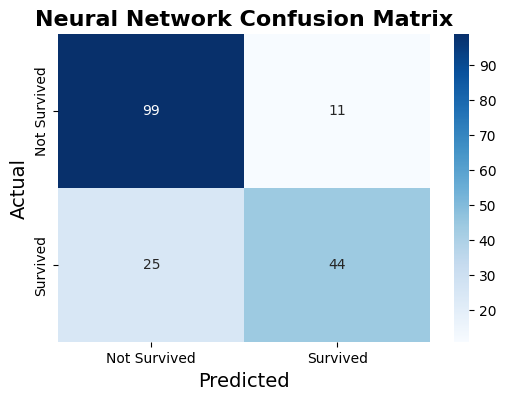

In [61]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

nn_model = MLPClassifier(hidden_layer_sizes=(100,), random_state=42, max_iter=1000)  # One hidden layer with 100 neurons
nn_model.fit(X_train, y_train)  # Train the model

y_pred_nn = nn_model.predict(X_test)

accuracy_nn = accuracy_score(y_test, y_pred_nn)
print(f"Neural Network Accuracy: {accuracy_nn:.2f}")

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_nn))

cm_nn = confusion_matrix(y_test, y_pred_nn)
print("\nConfusion Matrix:\n", cm_nn)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_nn, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Survived", "Survived"], yticklabels=["Not Survived", "Survived"])
plt.title("Neural Network Confusion Matrix", fontsize=16, weight='bold')
plt.xlabel("Predicted", fontsize=14)
plt.ylabel("Actual", fontsize=14)
plt.show()

Bagging Accuracy: 0.81

Classification Report:

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       110
           1       0.78      0.71      0.74        69

    accuracy                           0.81       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179


Confusion Matrix:
 [[96 14]
 [20 49]]


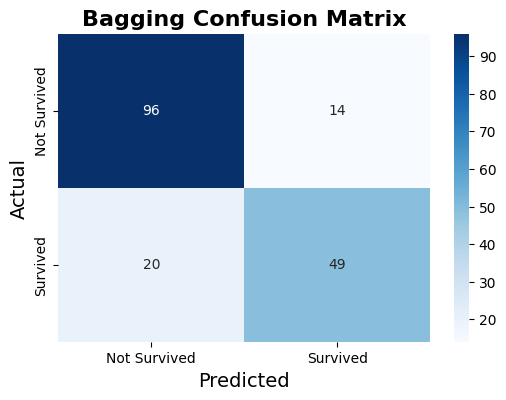

In [62]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

bagging_model = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)

bagging_model.fit(X_train, y_train)

y_pred_bagging = bagging_model.predict(X_test)

accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
print(f"Bagging Accuracy: {accuracy_bagging:.2f}")

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_bagging))

cm_bagging = confusion_matrix(y_test, y_pred_bagging)
print("\nConfusion Matrix:\n", cm_bagging)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_bagging, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Survived", "Survived"], yticklabels=["Not Survived", "Survived"])
plt.title("Bagging Confusion Matrix", fontsize=16, weight='bold')
plt.xlabel("Predicted", fontsize=14)
plt.ylabel("Actual", fontsize=14)
plt.show()

In [63]:
model_names = [
    "Logistic\nRegression",
    "K-Nearest\nNeighbors",
    "Support Vector\nMachine",
    "Decision\nTree",
    "Random Forest\nClassifier",
    "Neural\nNetwork",
    "Bagging\nModel",
]
model_scores = [
    accuracy_logreg,  # Logistic Regression
    accuracy_knn,  # K-Nearest Neighbors
    accuracy_svm,  # Support Vector Machine
    accuracy_dt,  # Decision Tree
    accuracy_rf,  # Random Forest
    accuracy_nn,  # Neural Network
    accuracy_bagging,  # Bagging Classifier Model
]

# Print the accuracies
print("Accuracies for the models: ")
for name, score in zip(model_names, model_scores):
    print(f"{name}: {score:.2f}")

Accuracies for the models: 
Logistic
Regression: 0.79
K-Nearest
Neighbors: 0.78
Support Vector
Machine: 0.83
Decision
Tree: 0.80
Random Forest
Classifier: 0.81
Neural
Network: 0.80
Bagging
Model: 0.81


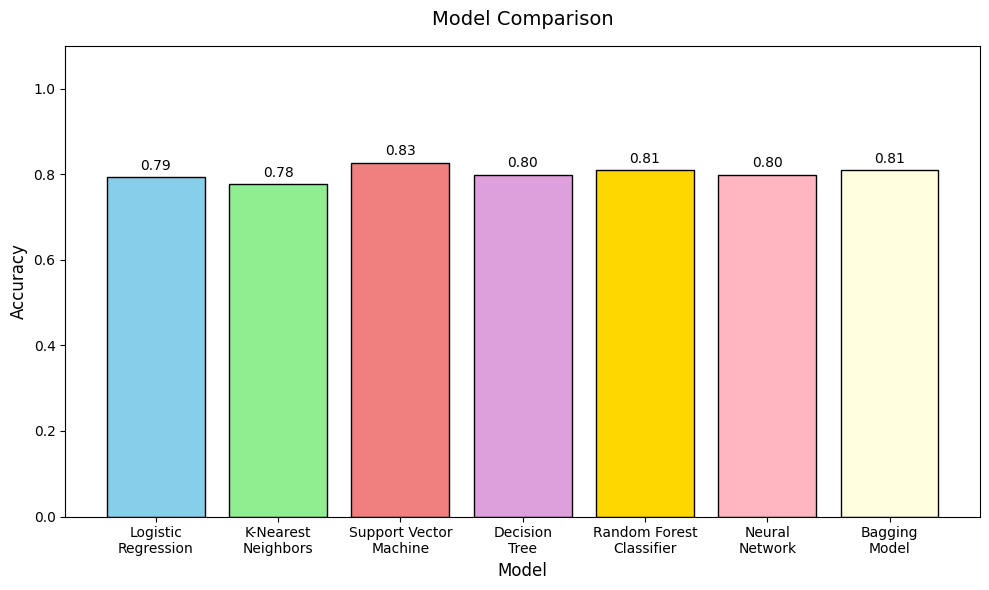

In [64]:
# Plot the accuracies
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(model_names, model_scores, color=['skyblue', 'lightgreen', 'lightcoral', 'plum', 'gold', 'lightpink', 'lightyellow'], edgecolor='black')

# Add accuracy values above bars
for bar, score in zip(bars, model_scores):
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 0.01,
        f"{score:.2f}",
        ha="center",
        va="bottom",
        fontsize=10,
        color="black",
    )

# Customize labels and title
ax.set_xlabel("Model", fontsize=12)
ax.set_ylabel("Accuracy", fontsize=12)
ax.set_title("Model Comparison", fontsize=14, pad=15)
ax.set_ylim(0, 1.1)  # Extend y-axis slightly for clarity

# Display the plot
plt.xticks()  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()